# RCL võnkering ja sumbuvad võnkumised

<div style="float: left;">Indrek Jõgi<br><span style="font-size: 75%;">TÜ Füüsika Instituut</span></div><div style="float: right;">Viimati muudetud: 7.12.2018</div>

Selle töölehe eesmärk on analoogiliselt RL ja RC töölehega uurida vahelduvvooluahelaid ja konkreetsemalt sumbuvaid võnkeringe. Antud juhul on ahelas järjestiku takisti $R$, mahtuvus $C$ ja induktiivsus $L$.

Sellise elektromotoorjõu allikata ahela korral saab koostada järgneva diferentsiaalvõrrandi:
$L \frac{d^2 Q}{dt^2} + R \frac{dQ}{dt} + \frac{Q}{C} = 0$.
Esimene liige tuleb siin pingelangust induktiivsel takistusel $U_L = L \frac{dI}{dt}$, kus omakorda $I = \frac{dQ}{dt}$, teine liige takistil langevast pingest $ U_R = R I$ ning kolmas pingest kondensaatoril $U_C = \frac{Q}{C}$.


Teist järku diferentsiaalvõrrandi lahendamine pythonis funktsiooniga $odeint$ vajab väikseid täiendusi. Selleks tuleb muuta üks teistjärku diferentsiaalvõrrand kahest esimest järku diferentsiaalvõrrandist koosnevaks süsteemiks. Teise tuletise laengust $Q$ saab asendada tuletisega voolust. Eeltoodud võrrand saab sel juhul kuju $L \frac{dI}{dt} + R I + \frac{Q}{C} = 0$. Teine võrrand on $I = \frac{dQ}{dt}$. Seejärel tuleb esimene võrrand jagada läbi induktiivsusega $L$ ja jätta vasakule poole vaid esimene tuletis voolust: $\frac{dI}{dt} = - I \frac{R}{L} - \frac{Q}{C R}$. Teisel võrrandil tuleb pooled ära vahetada: $\frac{dQ}{dt} = I $.

Seejärel tuleb defineerida funktsioon, mille sisendparameetrid on muutujad $q$, $i$ ja aeg $t$. Lisaks on funktsioonis lisaparameetrid $R$, $L$ ja $C$ jaoks. Funktsiooni sees ongi näidatud eeltoodud esimese tuletise sõltuvus eeltoodud parameetritest ja $q$-st endast.

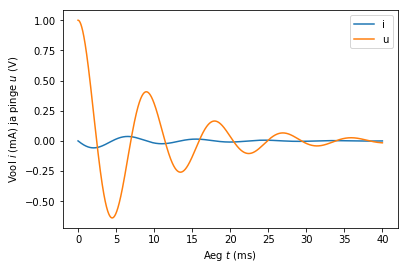

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# funktsioon, mis tagastab dq/dt
def RCLmodel(RLC,t,r,l,c):
    i = RLC[0]
    q = RLC[1]
    didt = -i*r/l - q /r/c
    dqdt = i
    return didt, dqdt

# Defineeri R, L ja C
R = 20.0     # ühik oom
L = 0.1      # ühik H
C = 100.0e-9 # ühik F

# algtingimused
i0 = 0        # ühik A
u0 = 1        # ühik V
q0 = u0*C     # ühik C

RCL0 = [i0,q0]

# ajapunktid
Nr = 10000
t = np.linspace(0,0.4e-1,Nr)   #allpool kasutatud takistuse ja mahtuvuse väärtuste korral võiks t olla millisekundites



# lahenda ODE
RLCl = odeint(RCLmodel,RCL0,t, args=(R,L,C))

it = RLCl[:,0]
qt = RLCl[:,1]

# esita tulemused graafiliselt
plt.plot(t*1000,it*1000, label="i")
plt.plot(t*1000,qt/C, label="u")
plt.xlabel('Aeg $t$ (ms)')
plt.ylabel('Vool $i$ (mA) ja pinge $u$ (V)')
plt.legend(loc='upper right')
plt.show()

Kontrollküsimused:

 - Täiendage graafikut lisades voolu ja pinge jaoks analüütilised valemid!
 - Leidke katseliselt, millise takistuse väärtuse korral muutub võnkumine aperioodiliseks tühjenemiseks?